# Preprocessing steps
1. Eliminate duplicates
2. Change data column types and rename
3. Impute missing data
4. Find outliers


In [147]:
import pandas as pd
import seaborn as sns

In [148]:
df = pd.read_csv('combined_df.csv')
df.info()

C:\Users\arjun\AppData\Local\Temp\ipykernel_21164\3829800822.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_df.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731101 entries, 0 to 6731100
Data columns (total 5 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   CollisionId             int64  
 1   ExtentOfInjuryCode      object 
 2   Day Of Week             object 
 3   Crash Time Description  float64
 4   IsHighwayRelated        object 
dtypes: float64(1), int64(1), object(3)
memory usage: 256.8+ MB


In [149]:
columns = ['CollisionId', 'ExtentOfInjuryCode', 'Day Of Week','Crash Time Description', 'IsHighwayRelated']

for i in columns:
    print(df[i].value_counts())


CollisionId
3873036    99
4561191    92
317062     74
3371352    72
525035     72
           ..
1107361     1
1107360     1
1107359     1
1107358     1
4887390     1
Name: count, Length: 4257346, dtype: int64
ExtentOfInjuryCode
ComplaintOfPainInactive    786235
PossibleInjury             737903
SuspectMinor               428904
OtherVisibleInactive       278439
SuspectSerious             104920
SevereInactive              55072
Fatal                       38364
Name: count, dtype: int64
Day Of Week
Friday       1088367
Saturday     1017804
Thursday      955825
Wednesday     934172
Tuesday       923225
Monday        898364
Sunday        892979
Name: count, dtype: int64
Crash Time Description
2500.0    49265
1600.0    40487
1500.0    39241
1700.0    38513
1730.0    38440
          ...  
2504.0        1
2537.0        1
2532.0        1
2514.0        1
2558.0        1
Name: count, Length: 1466, dtype: int64
IsHighwayRelated
False    3910132
True     2800601
Name: count, dtype: int64


## Duplicates

In [150]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,CollisionId,ExtentOfInjuryCode,Day Of Week,Crash Time Description,IsHighwayRelated
2,104500,NaN,Tuesday,1725.0,True
3,104500,NaN,Tuesday,1725.0,True
4,104500,NaN,Tuesday,1725.0,True
5,104500,NaN,Tuesday,1725.0,True
6,104500,NaN,Tuesday,1725.0,True
...,...,...,...,...,...
6731086,4887407,PossibleInjury,NaN,NaN,NaN
6731087,4887407,PossibleInjury,NaN,NaN,NaN
6731088,4887407,PossibleInjury,NaN,NaN,NaN
6731094,4887396,SuspectMinor,NaN,NaN,NaN


In [151]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5022745 entries, 0 to 6731100
Data columns (total 5 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   CollisionId             int64  
 1   ExtentOfInjuryCode      object 
 2   Day Of Week             object 
 3   Crash Time Description  float64
 4   IsHighwayRelated        object 
dtypes: float64(1), int64(1), object(3)
memory usage: 229.9+ MB


In [152]:
#check for duplicate rows
duplicates = df[df.duplicated(keep=False)]
duplicates

,CollisionId,ExtentOfInjuryCode,Day Of Week,Crash Time Description,IsHighwayRelated


In [153]:
#double check data
columns = ['CollisionId', 'ExtentOfInjuryCode', 'Day Of Week','Crash Time Description', 'IsHighwayRelated']

for i in columns:
    print(df[i].value_counts())

CollisionId
2122969    5
869066     5
2127830    5
1034466    5
926811     5
          ..
954126     1
954125     1
954124     1
954123     1
4887390    1
Name: count, Length: 4257346, dtype: int64
ExtentOfInjuryCode
ComplaintOfPainInactive    570882
PossibleInjury             541083
SuspectMinor               350747
OtherVisibleInactive       246118
SuspectSerious              93054
SevereInactive              50548
Fatal                       35384
Name: count, dtype: int64
Day Of Week
Friday       810841
Thursday     734785
Wednesday    720892
Saturday     714833
Tuesday      714649
Monday       686935
Sunday       625848
Name: count, dtype: int64
Crash Time Description
2500.0    45270
1600.0    29630
1700.0    28736
1500.0    28672
1730.0    28199
          ...  
2508.0        1
2549.0        1
2514.0        1
2536.0        1
2558.0        1
Name: count, Length: 1466, dtype: int64
IsHighwayRelated
False    3023895
True     1984885
Name: count, dtype: int64


In [154]:
#since df still has duplicate CollisionIds, further exploration required
duplicates = df[df['CollisionId'] == 869066]
duplicates

,CollisionId,ExtentOfInjuryCode,Day Of Week,Crash Time Description,IsHighwayRelated
1984509,869066,NaN,Saturday,1030.0,True
1984510,869066,PossibleInjury,Saturday,1030.0,True
1984513,869066,SuspectMinor,Saturday,1030.0,True
1984514,869066,SuspectSerious,Saturday,1030.0,True
1984515,869066,Fatal,Saturday,1030.0,True


In [155]:
#upon further eval, learned that the reason why there were many different collision ids is because there may be many people in a car which is creating this issue. 
#will remove CollisionId and replace with regular id
df["ID"] = range(1, len(df) + 1)

df = df.drop('CollisionId', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5022745 entries, 0 to 6731100
Data columns (total 5 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ExtentOfInjuryCode      object 
 1   Day Of Week             object 
 2   Crash Time Description  float64
 3   IsHighwayRelated        object 
 4   ID                      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 229.9+ MB


In [156]:
#reorder columns
df = df[['ID', 'ExtentOfInjuryCode', 'Day Of Week','Crash Time Description','IsHighwayRelated']]
df.head()


,ID,ExtentOfInjuryCode,Day Of Week,Crash Time Description,IsHighwayRelated
0,1,SevereInactive,Sunday,455.0,True
1,2,NaN,Friday,1100.0,True
2,3,NaN,Tuesday,1725.0,True
7,4,NaN,Tuesday,1545.0,True
8,5,ComplaintOfPainInactive,Tuesday,1545.0,True


## Data Column Type and rename

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5022745 entries, 0 to 6731100
Data columns (total 5 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ID                      int64  
 1   ExtentOfInjuryCode      object 
 2   Day Of Week             object 
 3   Crash Time Description  float64
 4   IsHighwayRelated        object 
dtypes: float64(1), int64(1), object(3)
memory usage: 229.9+ MB


In [158]:
#rename columns
df = df.rename(columns={'ID': 'ID', 'ExtentOfInjuryCode': 'is_injured', 'Day Of Week': 'is_weekend', 'Crash Time Description': 'crash_time', 'IsHighwayRelated': 'is_highway'})

In [159]:
#changing coolumn types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5022745 entries, 0 to 6731100
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ID          int64  
 1   is_injured  object 
 2   is_weekend  object 
 3   crash_time  float64
 4   is_highway  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 229.9+ MB


In [160]:
df['ID'] = df['ID'].astype('int16')
df['crash_time'] = df['crash_time'].astype('float32')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5022745 entries, 0 to 6731100
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ID          int16  
 1   is_injured  object 
 2   is_weekend  object 
 3   crash_time  float32
 4   is_highway  object 
dtypes: float32(1), int16(1), object(3)
memory usage: 182.0+ MB


## Missing Values

In [162]:
columns = ['ID','is_injured', 'is_weekend','crash_time','is_highway']
for i in columns:
    print(f" {i} : {df[i].isnull().sum()}")


 ID : 0
 is_injured : 3134929
 is_weekend : 13962
 crash_time : 13964
 is_highway : 13965


In [163]:
#since is_injured is categorical
injured_mode = df['is_injured'].mode()[0]

df['is_injured'] = df['is_injured'].fillna(injured_mode)

df['is_injured'].isnull().sum()


0

In [164]:
#since is_weekedn is categorical
weekend_mode = df['is_weekend'].mode()[0]

df['is_weekend'] = df['is_weekend'].fillna(weekend_mode)

df['is_weekend'].isnull().sum()

0

In [165]:
#since is_highway is categorical
highway_mode = df['is_highway'].mode()[0]

df['is_highway'] = df['is_highway'].fillna(highway_mode)

df['is_highway'].isnull().sum()

0

c:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


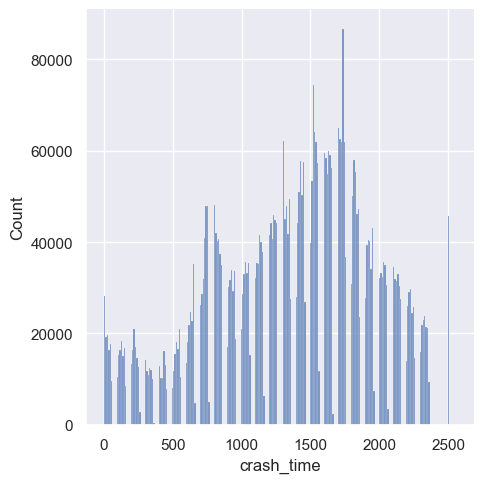

In [166]:
#shape of crash time
sns.displot(data=df, x=df['crash_time'])

c:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


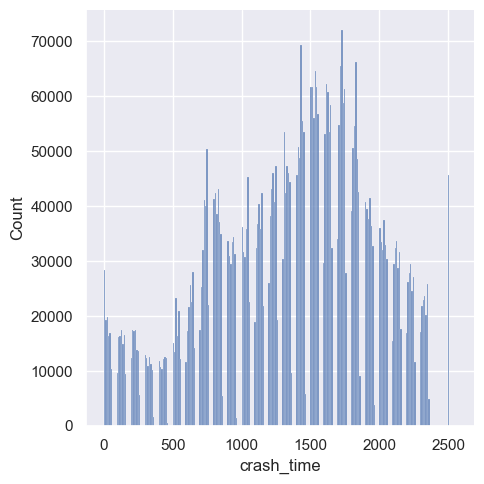

In [167]:
#median imputation for crash_time
df['crash_time'] = df['crash_time'].fillna(df['crash_time'].median())

sns.displot(data=df, x=df['crash_time'])

In [168]:
df['crash_time'].isnull().sum()

0

## Recoding Variables

In [169]:
df['is_injured'].value_counts()

is_injured
ComplaintOfPainInactive    3705811
PossibleInjury              541083
SuspectMinor                350747
OtherVisibleInactive        246118
SuspectSerious               93054
SevereInactive               50548
Fatal                        35384
Name: count, dtype: int64

In [170]:
#will group ComplaintOfPainInactive and OtherVisibleInactive and SevereInactive together as 0 and the rest as 1
df['is_injured'] = df['is_injured'].map({'ComplaintOfPainInactive': 0, 'PossibleInjury': 1, 'SuspectMinor': 1, 'OtherVisibleInactive': 0,'SuspectSerious': 1, 'SevereInactive': 0, "Fatal": 1 })

df['is_injured'].value_counts()

is_injured
0    4002477
1    1020268
Name: count, dtype: int64

In [171]:
df['is_weekend'].value_counts()

is_weekend
Friday       824803
Thursday     734785
Wednesday    720892
Saturday     714833
Tuesday      714649
Monday       686935
Sunday       625848
Name: count, dtype: int64

In [172]:
##will group Saturday and Sunday together as 1 and the rest as 0
df['is_weekend'] = df['is_weekend'].map({'Sunday': 1, 'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0,'Saturday': 1})

df['is_weekend'].value_counts()

is_weekend
0    3682064
1    1340681
Name: count, dtype: int64

In [173]:
df['is_highway'].value_counts()

is_highway
False    3037860
True     1984885
Name: count, dtype: int64

In [174]:
df['is_highway'] = df['is_highway'].replace({True: 1, False: 0})

In [175]:
df['is_highway'].value_counts()

is_highway
0    3037860
1    1984885
Name: count, dtype: int64

In [177]:
df['crash_time'].value_counts()

crash_time
2500.0    45270
1600.0    29630
1700.0    28736
1500.0    28672
1730.0    28199
          ...  
2508.0        1
2549.0        1
2514.0        1
2536.0        1
2558.0        1
Name: count, Length: 1466, dtype: int64

In [187]:
df['crash_time'] = df['crash_time'].round(decimals= -2)
df['crash_time'].value_counts()

crash_time
1600.0    372109
1700.0    353653
1500.0    341142
1400.0    338550
1800.0    338313
1200.0    270793
800.0     268419
1300.0    257131
1900.0    227939
2000.0    213830
1100.0    212992
1000.0    210849
700.0     196803
900.0     186089
2100.0    182331
2200.0    175891
600.0     144319
2300.0    132092
200.0     105935
0.0       100740
100.0      94710
500.0      89514
400.0      72652
300.0      70107
2500.0     45671
2400.0     20162
2600.0         9
Name: count, dtype: int64

In [ ]:
#converting 2400 to 0, 2500 to 100, 2600 to 200
def standardize_time(val):
    if val >= 2400:
        return int(val - 2400)
    return int(val)

df["crash_time"] = df["crash_time"].apply(standardize_time)

In [199]:
df.head(30)

,ID,is_injured,is_weekend,crash_time,is_highway
0,1,0,1,500,1
1,2,0,0,1100,1
2,3,0,0,1700,1
7,4,0,0,1500,1
8,5,0,0,1500,1
9,6,0,0,1600,0
10,7,0,0,800,0
11,8,0,1,1100,1
12,9,0,0,1000,0
13,10,0,0,900,1


In [200]:
df.to_csv('preprocessed_df.csv', index=False)